In [1]:
import numpy as np
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import pandas as pd
import torchdiffeq
import torch
import torch.nn as nn


In [2]:
import warnings

# Filter out DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your code here


In [3]:
adata = scv.datasets.gastrulation_erythroid()
scv.pp.filter_and_normalize(adata, n_top_genes=2000)
scv.pp.moments(adata)
scv.tl.velocity(adata)


Normalized count data: X, spliced, unspliced.


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.pro

Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:13) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


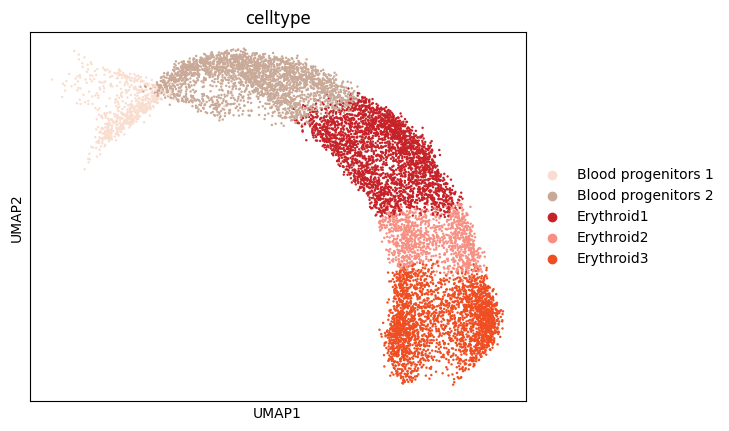

In [4]:
sc.pl.umap(adata, color="celltype")

In [5]:
adata.obs["stage"].values

['E7.5', 'E7.5', 'E7.5', 'E7.5', 'E7.5', ..., 'E8.5', 'E8.5', 'E8.5', 'E8.5', 'E8.5']
Length: 9815
Categories (7, object): ['E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5']

In [6]:
import scanpy as sc
import pandas as pd

# Assuming 'adata' is your original AnnData object
unique_stages = pd.unique(adata.obs["stage"].values)

# Dictionary to hold the subsetted AnnData objects
stage_specific_adatas = {}

for stage in unique_stages:
    # Subset the AnnData object for the current stage
    stage_adata = adata[adata.obs["stage"] == stage].copy()
    
    # Store the subsetted AnnData object in the dictionary
    stage_specific_adatas[stage] = stage_adata

stage_specific_adatas


{'E7.5': AnnData object with n_obs × n_vars = 471 × 2000
     obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
     var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
     uns: 'celltype_colors', 'log1p', 'neighbors', 'velocity_params'
     obsm: 'X_pca', 'X_umap'
     layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
     obsp: 'distances', 'connectivities',
 'E7.75': AnnData object with n_obs × n_vars = 1709 × 2000
     obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
     var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', '

In [7]:
E700 = stage_specific_adatas['E7.0']
E725 = stage_specific_adatas['E7.25']
E750 = stage_specific_adatas['E7.5']
E775 = stage_specific_adatas['E7.75']
E800 = stage_specific_adatas['E8.0']
E825 = stage_specific_adatas['E8.25']
E850 = stage_specific_adatas['E8.5']

In [8]:
L=[E700, E725, E750, E775, E800, E825, E850]

(43, 2000)


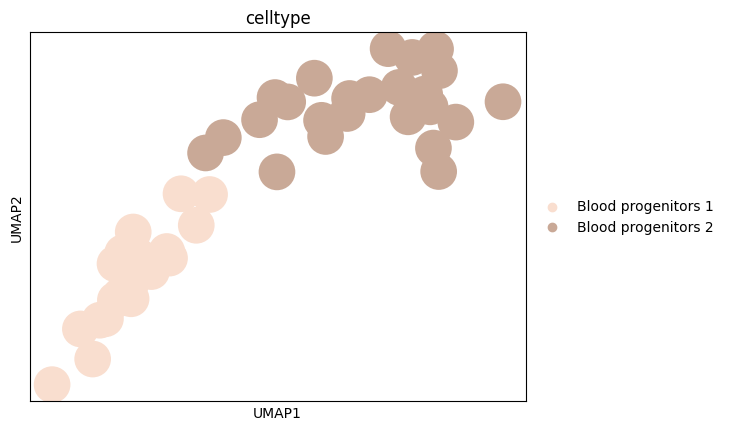

(65, 2000)


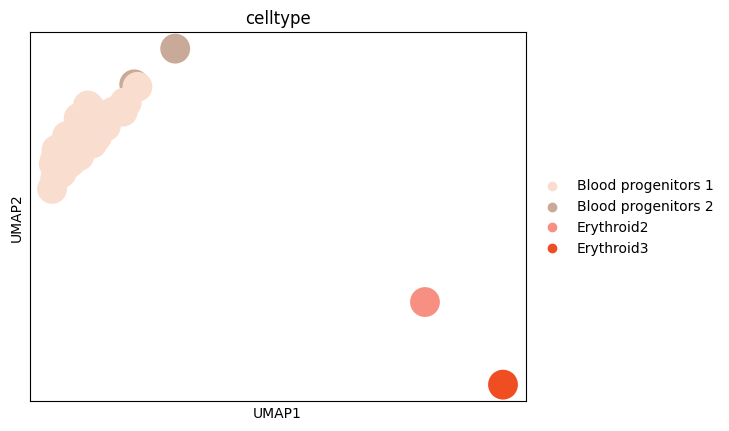

(471, 2000)


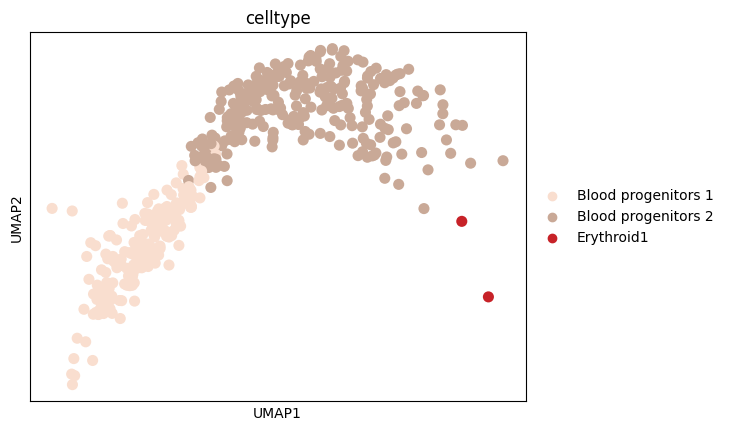

(1709, 2000)


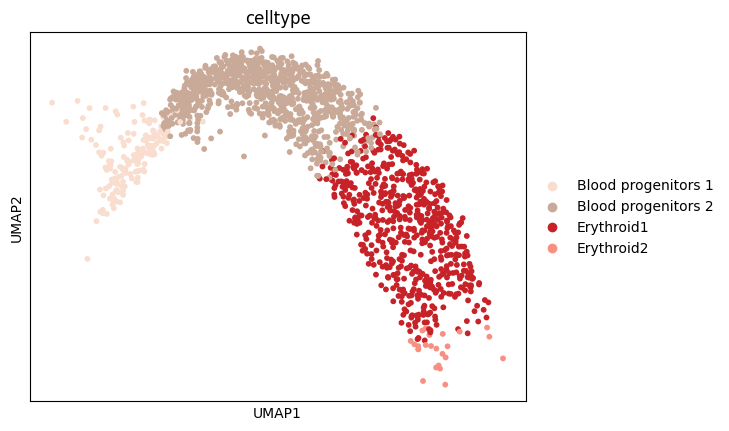

(2811, 2000)


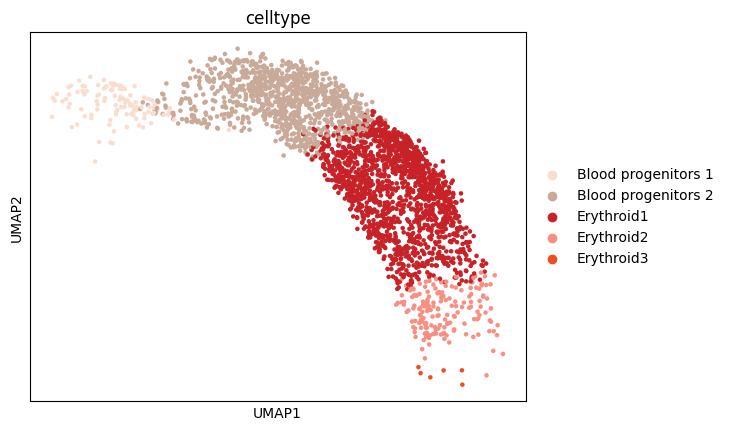

(1695, 2000)


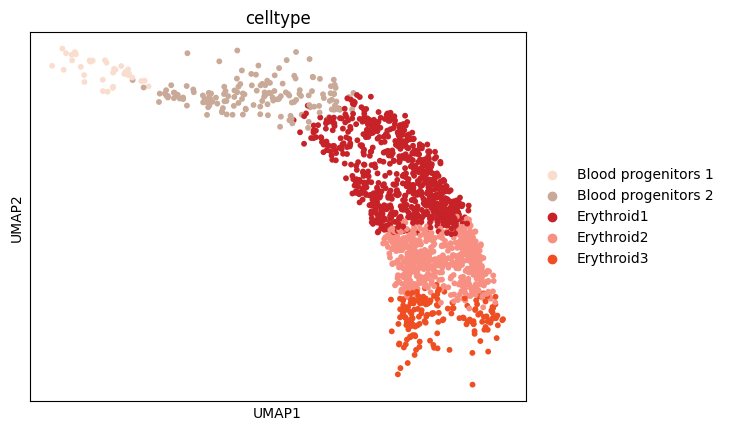

(3021, 2000)


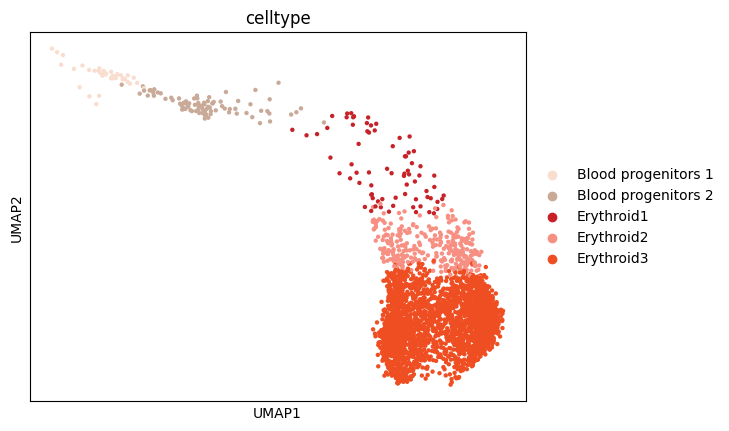

In [9]:
for el in L:
    print(el.shape)
    #print(el.obs["celltype"])
    sc.pl.umap(el,color="celltype")

E8.5     3021
E8.0     2811
E7.75    1709
E8.25    1695
E7.5      471
E7.25      65
E7.0       43
Name: stage, dtype: int64


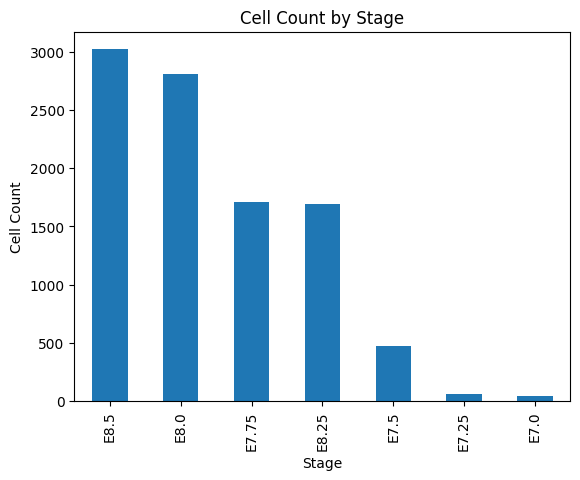

In [10]:
cell_counts = adata.obs["stage"].value_counts()

print(cell_counts)

# Assuming cell_counts contains the counts of cells for each category
cell_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Stage')
plt.ylabel('Cell Count')
plt.title('Cell Count by Stage')

# Show the plot
plt.show()

In [11]:
scv.tl.velocity(adata)
scv.tl.rank_velocity_genes(adata, groupby='celltype', min_corr=.3)
df = pd.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

computing velocities


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/scvelo/tools/utils.py:463: DeprecationWarning: Please import `rankdata` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import rankdata


    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,Blood progenitors 1,Blood progenitors 2,Erythroid1,Erythroid2,Erythroid3
0,Tacc1,Rbpms,Mllt3,Hmga2,Malat1
1,Zfp608,Fermt3,Blvrb,Ccne2,Tpm4
2,Cobll1,Calm2,Igf2bp2,Nrip3,Hmga2
3,Prtg,Tacc1,Hmga2,Gnai2,Abcg2
4,Ptpn14,Trim71,Calm2,Cmtm7,Ubash3b


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use

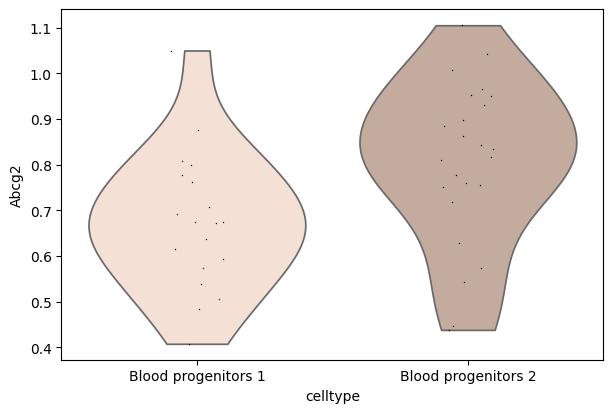

/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please u

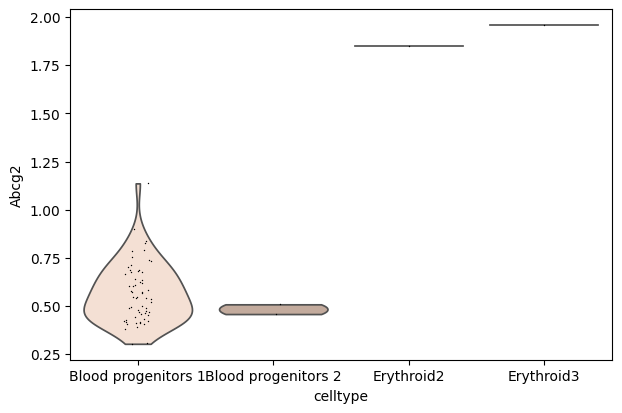

/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use

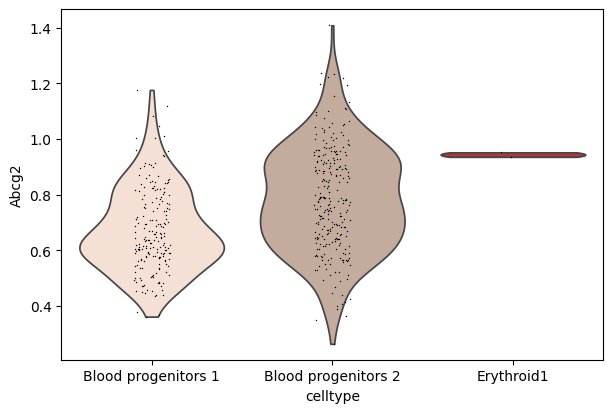

/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use

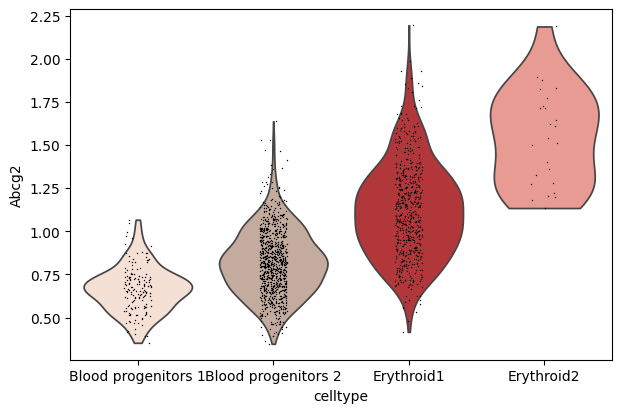

/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use

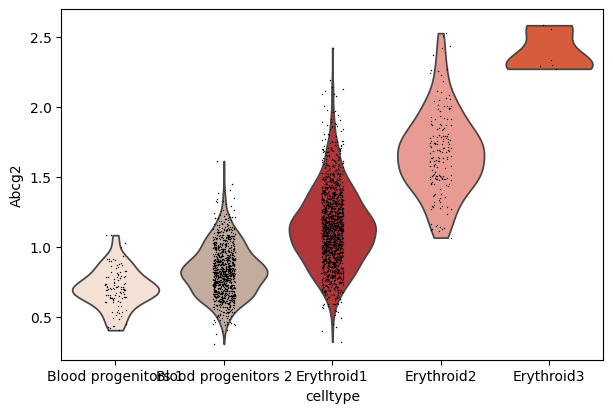

/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use

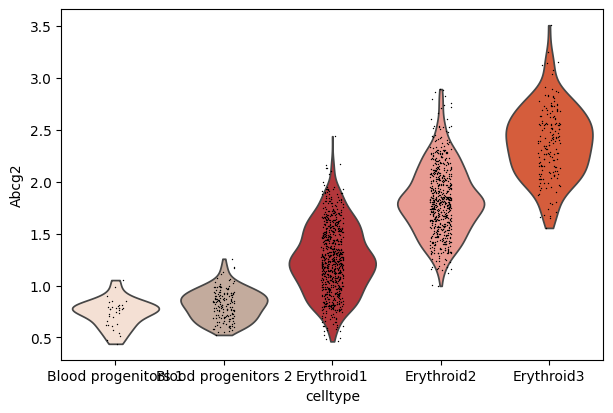

/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use

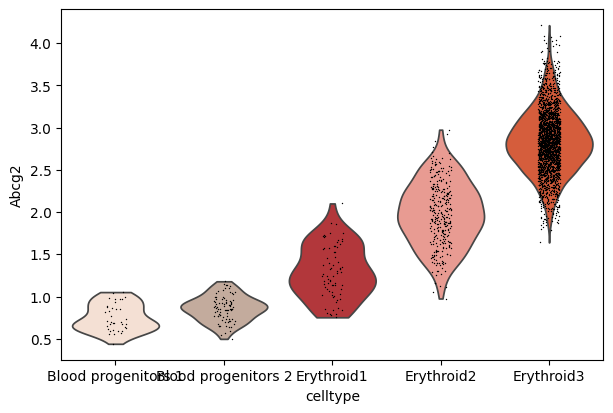

In [12]:
for el in L:
    sc.pl.violin(el, "Abcg2", groupby="celltype", layer="Ms")

In [13]:
x = adata[:, "Abcg2"].layers["Ms"].copy()

In [14]:
y = adata[:, "Abcg2"].obs["stage"].values

           mean       std
stage                    
E7.0   0.747684  0.176498
E7.25  0.607087  0.277672
E7.5   0.737063  0.181747
E7.75  0.919214  0.282887
E8.0   1.053290  0.334670
E8.25  1.521841  0.544661
E8.5   2.628790  0.622781


<Axes: xlabel='stage'>

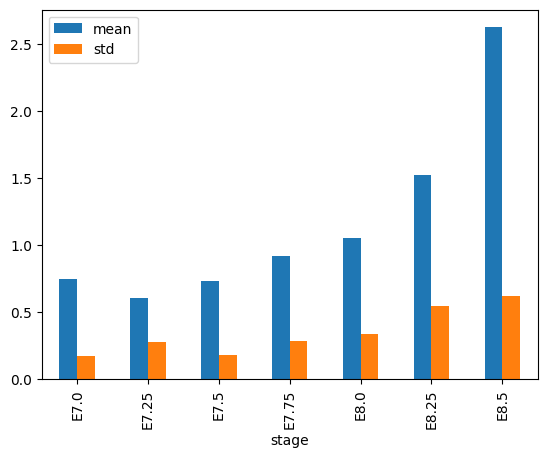

In [15]:
import pandas as pd
import numpy as np

# Assuming 'adata' is your AnnData object and you've already imported it

# Step 1: Extract gene expression values and stage information
gene_expression = adata[:, "Abcg2"].layers["Ms"]
stages = adata[:, "Abcg2"].obs["stage"]

# Step 2: Convert to DataFrame
# Convert the gene expression to a numpy array if it isn't already one
gene_expression_array = np.array(gene_expression)
# Ensure it's a 1D array for simplicity
gene_expression_array = gene_expression_array.flatten()

# Create a DataFrame from the stage information and gene expression
df = pd.DataFrame({
    'stage': stages,
    'gene_expression': gene_expression_array
})

# Step 3: Group by 'stage' and calculate mean and standard deviation
grouped = df.groupby('stage')['gene_expression'].agg(['mean', 'std'])

print(grouped)
grouped.plot(kind='bar')



In [16]:
import pandas as pd
import numpy as np

# Assuming 'adata' is your AnnData object and you've already imported it

# Step 1: Extract gene expression values, stage, and cell type information
gene_expression = adata[:, "Abcg2"].layers["Ms"]
stages = adata[:, "Abcg2"].obs["stage"]
cell_types = adata[:, "Abcg2"].obs["celltype"]  # Assuming cell type information is stored here

# Step 2: Convert to DataFrame
# Convert the gene expression to a numpy array if it isn't already one
gene_expression_array = np.array(gene_expression)
# Ensure it's a 1D array for simplicity
gene_expression_array = gene_expression_array.flatten()

# Create a DataFrame from the stage information, cell type, and gene expression
df = pd.DataFrame({
    'stage': stages,
    'celltype': cell_types,  # Include cell type in the DataFrame
    'gene_expression': gene_expression_array
})

# Step 3: Group by 'stage' and 'cell_type', then calculate mean and standard deviation
grouped = df.groupby(['stage', 'celltype'])['gene_expression'].agg(['mean', 'std'])

print(grouped)
#grouped.unstack().plot(kind='bar', subplots=True, layout=(2,1), figsize=(10, 8))


                               mean       std
stage celltype                               
E7.0  Blood progenitors 1  0.676314  0.151040
      Blood progenitors 2  0.804185  0.177461
      Erythroid1                NaN       NaN
      Erythroid2                NaN       NaN
      Erythroid3                NaN       NaN
E7.25 Blood progenitors 1  0.568622  0.155153
      Blood progenitors 2  0.483654  0.035609
      Erythroid1                NaN       NaN
      Erythroid2           1.850183       NaN
      Erythroid3           1.957226       NaN
E7.5  Blood progenitors 1  0.672392  0.151368
      Blood progenitors 2  0.784021  0.187883
      Erythroid1           0.944058  0.011284
      Erythroid2                NaN       NaN
      Erythroid3                NaN       NaN
E7.75 Blood progenitors 1  0.665139  0.131176
      Blood progenitors 2  0.819922  0.191281
      Erythroid1           1.123542  0.275109
      Erythroid2           1.542262  0.277976
      Erythroid3                Na

/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25

/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://n

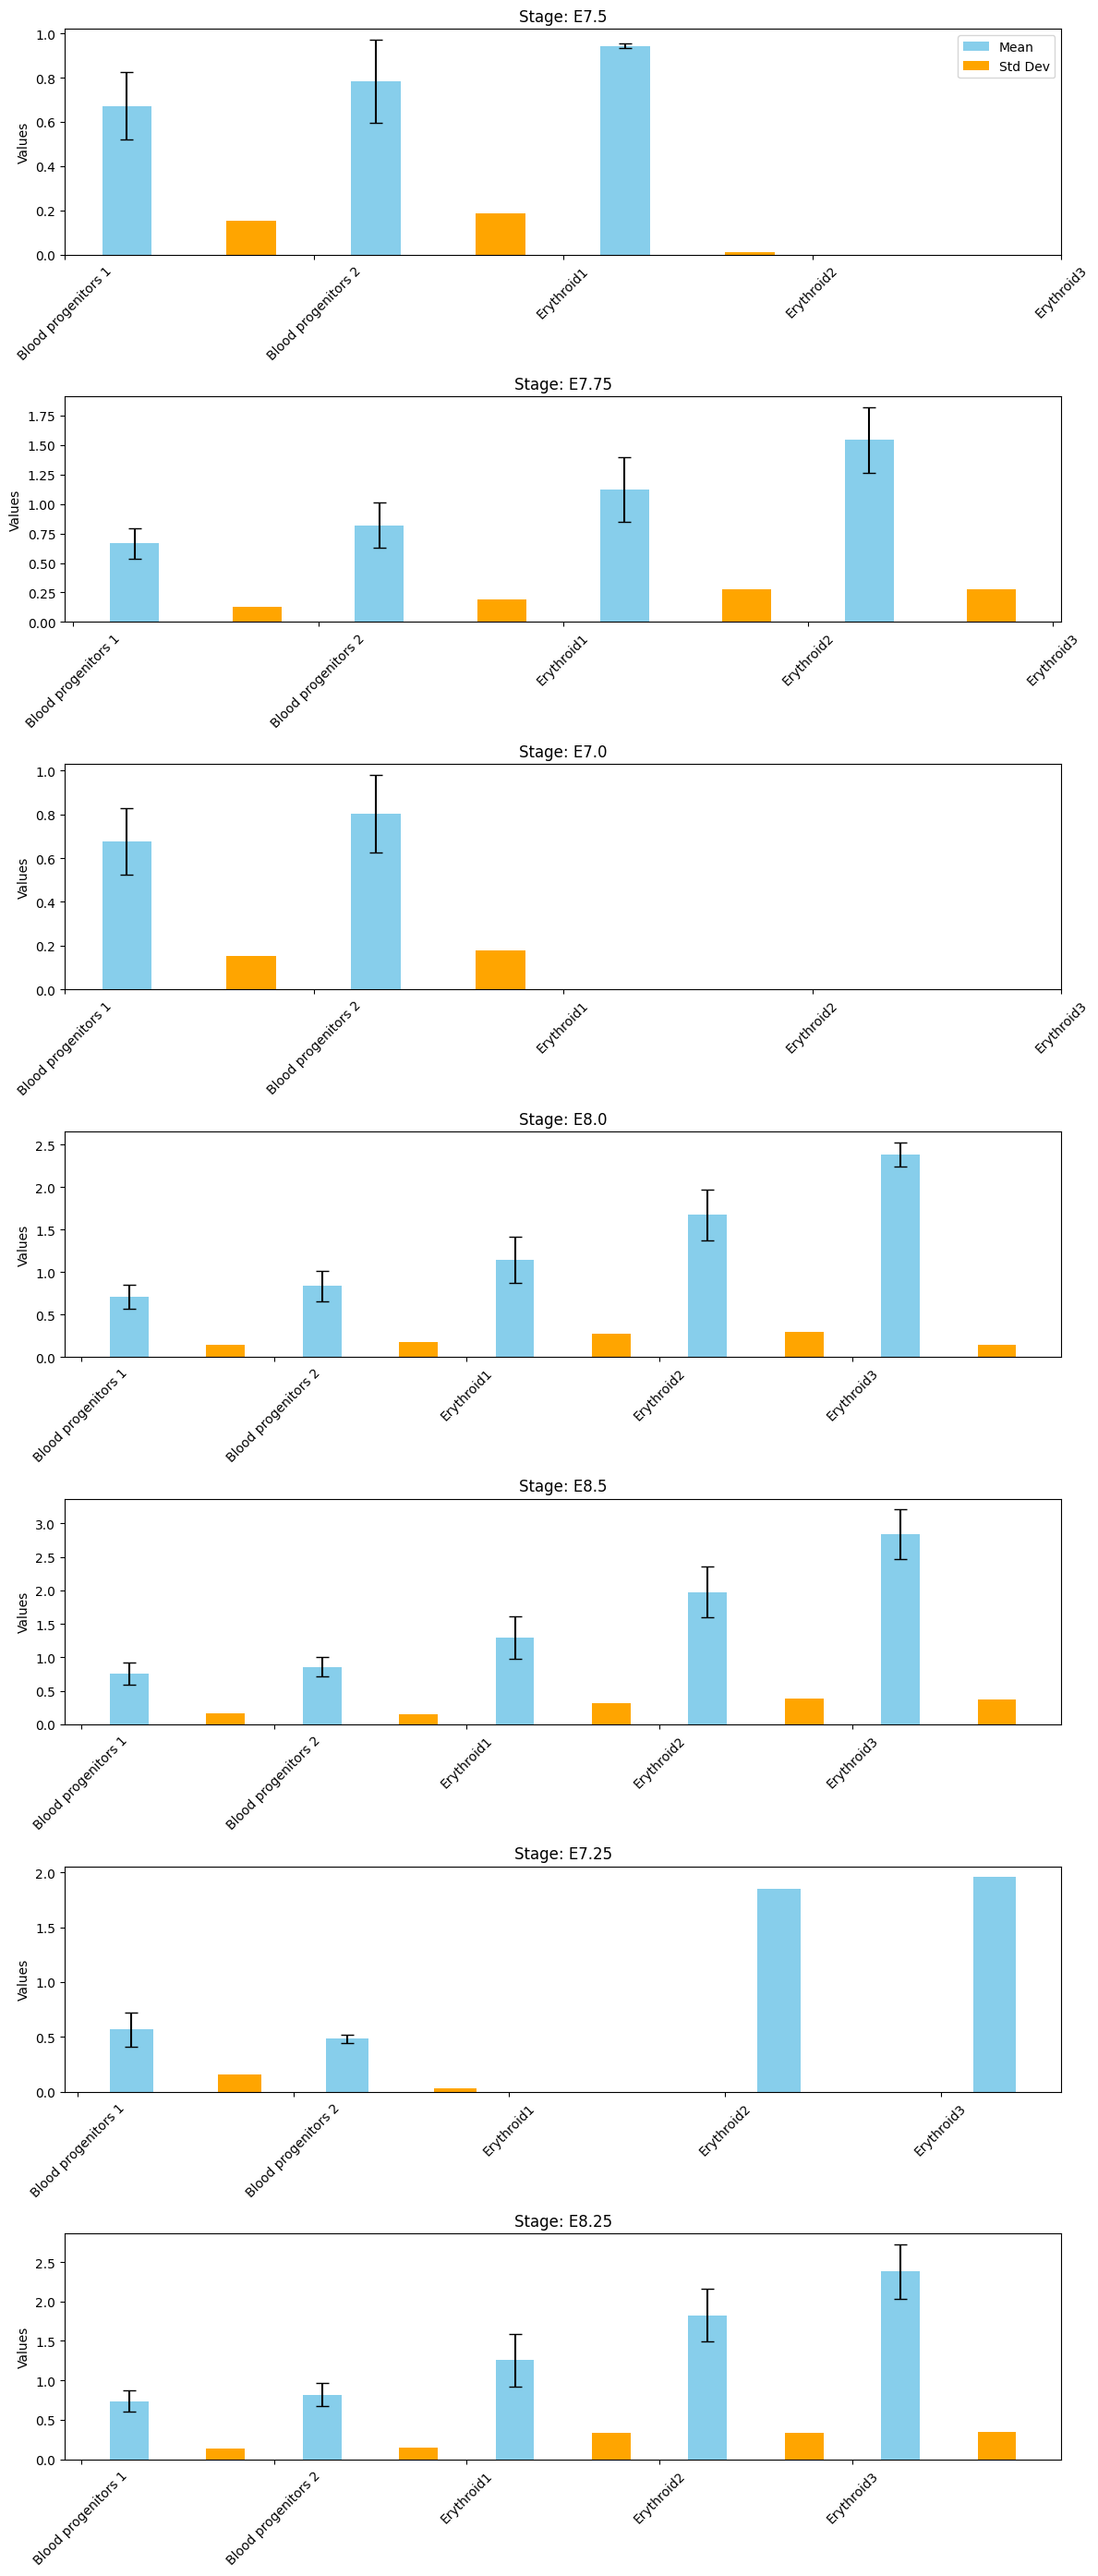

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Setup color palette for clarity
color_mean = 'skyblue'
color_std = 'orange'

# Determine the total number of bars needed per group (2 bars per cell type)
bars_per_celltype = 2

# Setup figure
fig, axes = plt.subplots(nrows=len(unique_stages), figsize=(12, 4 * len(unique_stages)), squeeze=False)

for stage_index, stage in enumerate(unique_stages):
    ax = axes[stage_index, 0]  # Each row has one plot per stage
    
    stage_group = grouped.loc[grouped.index.get_level_values('stage') == stage]
    celltypes = stage_group.index.get_level_values('celltype').unique()
    
    # Setup for multiple bars
    n_celltypes = len(celltypes)
    total_bars = n_celltypes * bars_per_celltype
    indices = np.arange(0, total_bars, bars_per_celltype)  # Starting index for each celltype group
    
    for celltype_index, celltype in enumerate(celltypes):
        cell_group = stage_group.loc[(stage, celltype)]

        # Positioning for mean and std bars
        mean_index = indices[celltype_index]
        std_index = mean_index + 1  # Directly next to the mean bar
        
        # Plotting mean with error bar
        ax.bar(mean_index, cell_group['mean'], color=color_mean, yerr=cell_group['std'], capsize=5, label='Mean' if celltype_index == 0 else "", width=0.4)
        
        # Plotting std without error bar
        ax.bar(std_index, cell_group['std'], color=color_std, label='Std Dev' if celltype_index == 0 else "", width=0.4)

    ax.set_title(f'Stage: {stage}')
    ax.set_xticks(indices + 0.5 - bars_per_celltype/2)
    ax.set_xticklabels(celltypes, rotation=45)
    ax.set_ylabel('Values')
    
    if stage_index == 0:  # Only add legend to the first plot for clarity
        ax.legend()

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
import h5py  # If you choose to use HDF5 for storage

# Placeholder for the structure to store the analysis results
results = {}

# Assuming `adata` has been loaded
gene_names = adata.var_names  # Adjust based on your AnnData structure

for gene in gene_names:
    gene_expression = adata[:, gene].layers["Ms"].flatten()
    stages = adata[:, gene].obs["stage"]
    cell_types = adata[:, gene].obs["celltype"]
    
    df = pd.DataFrame({
        'stage': stages,
        'celltype': cell_types,
        'gene_expression': gene_expression
    })
    
    grouped = df.groupby(['stage', 'celltype'])['gene_expression'].agg(['mean', 'std'])
    
    # Store in the results dictionary
    results[gene] = grouped.fillna(0)

# Optional: Save results to disk for later use
# This step requires the `tables` package for HDF5 support in pandas
# results.to_hdf('gene_expression_analysis.h5', key='all_genes', mode='w')


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25

In [23]:
import pickle 

with open('erythroid_data_dic.pkl', 'wb') as f:
    pickle.dump(results, f)

In [22]:
results["Abcg2"]

mean       std
stage celltype                               
E7.0  Blood progenitors 1  0.676314  0.151040
      Blood progenitors 2  0.804185  0.177461
      Erythroid1           0.000000  0.000000
      Erythroid2           0.000000  0.000000
      Erythroid3           0.000000  0.000000
E7.25 Blood progenitors 1  0.568622  0.155153
      Blood progenitors 2  0.483654  0.035609
      Erythroid1           0.000000  0.000000
      Erythroid2           1.850183  0.000000
      Erythroid3           1.957226  0.000000
E7.5  Blood progenitors 1  0.672392  0.151368
      Blood progenitors 2  0.784021  0.187883
      Erythroid1           0.944058  0.011284
      Erythroid2           0.000000  0.000000
      Erythroid3           0.000000  0.000000
E7.75 Blood progenitors 1  0.665139  0.131176
      Blood progenitors 2  0.819922  0.191281
      Erythroid1           1.123542  0.275109
      Erythroid2           1.542262  0.277976
      Erythroid3           0.000000  0.000000
E8.0  Blood progenitors 1  0.707583  0.141085
      Blood progenitors 2  0.834794  0.180514
      Erythroid1           1.143818  0.276169
      Erythroid2           1.672622  0.295241
      Erythroid3           2.390000  0.141538
E8.25 Blood progenitors 1  0.736657  0.134729
      Blood progenitors 2  0.817309  0.144969
      Erythroid1           1.254631  0.331135
      Erythroid2           1.825805  0.331727
      Erythroid3           2.377850  0.343616
E8.5  Blood progenitors 1  0.755429  0.161666
      Blood progenitors 2  0.860754  0.149760
      Erythroid1           1.294796  0.313197
      Erythroid2           1.977137  0.379467
      Erythroid3           2.835271  0.372080